In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt 
%matplotlib inline 

import seaborn as sns

In [148]:
data = pd.read_excel('/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/비즈니스 애널리틱스/Data/Utilities.xlsx', sheet_name='Data')

In [149]:
data.head()

,Company,RecordID,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,2,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,3,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,4,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,5,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [150]:
data.shape

(22, 10)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        22 non-null     object 
 1   RecordID       22 non-null     int64  
 2   Fixed_charge   22 non-null     float64
 3   RoR            22 non-null     float64
 4   Cost           22 non-null     int64  
 5   Load_factor    22 non-null     float64
 6   Demand_growth  22 non-null     float64
 7   Sales          22 non-null     int64  
 8   Nuclear        22 non-null     float64
 9   Fuel_Cost      22 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.8+ KB


In [152]:
data.isnull().sum()

Company          0
RecordID         0
Fixed_charge     0
RoR              0
Cost             0
Load_factor      0
Demand_growth    0
Sales            0
Nuclear          0
Fuel_Cost        0
dtype: int64

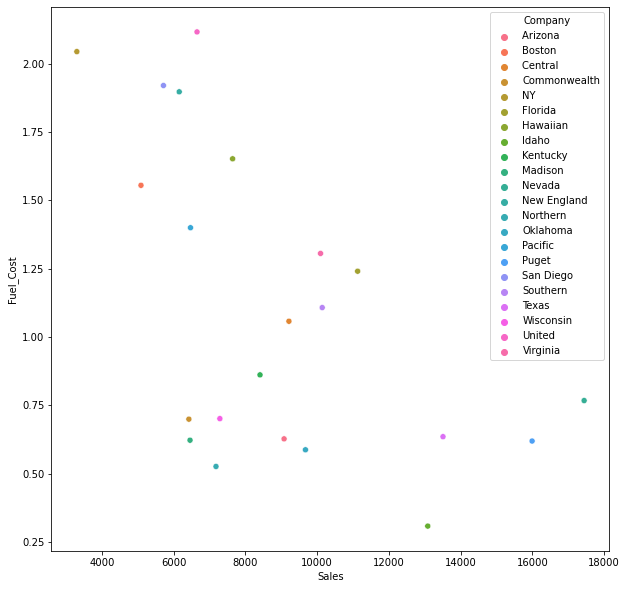

In [153]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Sales', y='Fuel_Cost', data=data, hue='Company')

plt.show()

In [154]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data.drop(columns=['Company'], axis=1, inplace=False))

In [155]:
data_scaled.shape

(22, 9)

In [156]:
data[['RecoredID','Fixed_charge', 'RoR', 'Cost', 'Load_factor', 'Demand_growth',  'Sales', 'Nuclear', 'Fuel_Cost']] = data_scaled.reshape(-1, 9)

In [157]:
data.head()

,Company,RecordID,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,RecoredID
0,Arizona,1,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765,-1.655032
1,Boston,2,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436,-1.497410
2,Central,3,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323,-1.339788
3,Commonwealth,4,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244,-1.182166
4,NY,5,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470,-1.024544


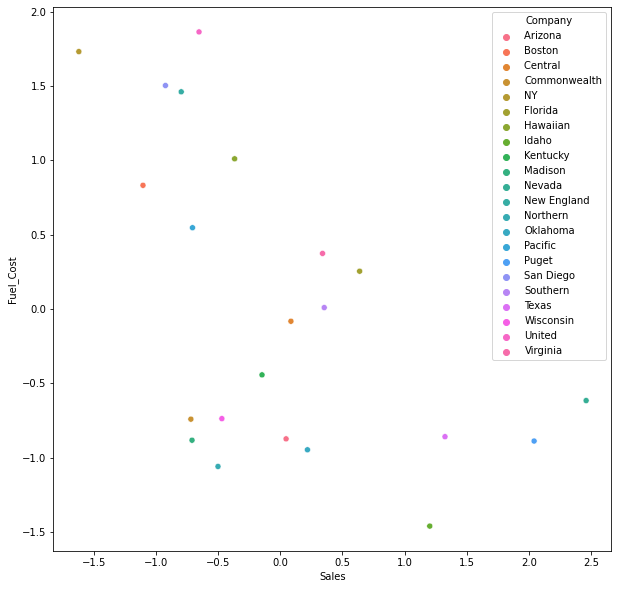

In [158]:
# 정규화된 버전 
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Sales', y='Fuel_Cost', data=data, hue='Company')

plt.show()

In [159]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data[['Sales', 'Fuel_Cost']],'single')

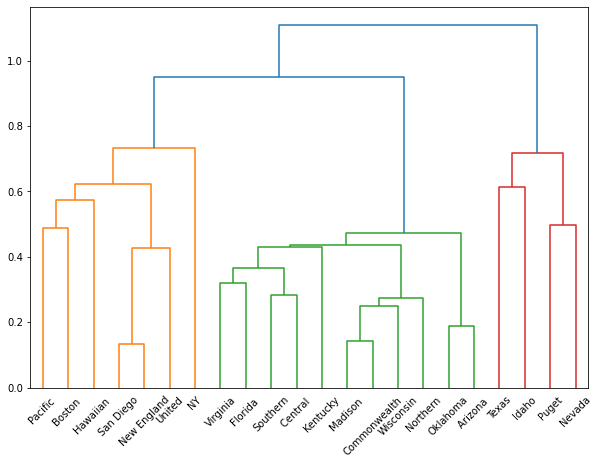

In [160]:
labelList = [i for i in data['Company']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [161]:
# kmeans 

In [162]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(data.drop(columns=['Company'], axis=1, inplace=False))

KMeans(n_clusters=6, random_state=0)

In [163]:
print(kmeans.labels_)

[1 1 1 1 1 3 3 5 3 2 5 2 2 2 4 4 4 0 0 0 0 0]


In [164]:
data['cluster'] = kmeans.labels_

In [165]:
data

,Company,RecordID,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,RecoredID,cluster
0,Arizona,1,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765,-1.655032,1
1,Boston,2,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436,-1.497410,1
2,Central,3,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323,-1.339788,1
3,Commonwealth,4,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244,-1.182166,1
4,NY,5,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470,-1.024544,1
5,Florida,6,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499,-0.866921,3
6,Hawaiian,7,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970,-0.709299,3
7,Idaho,8,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904,-0.551677,5
8,Kentucky,9,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073,-0.394055,3
9,Madison,10,0.032779,0.758801,0.716081,-0.912516,-0.177548,-0.708993,1.657945,-0.882967,-0.236433,2


In [166]:
# 군집화 시각화
# 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data.drop(columns=['Company', 'cluster'], axis=1, inplace=False))

data['pca_x'] = pca_transformed[:, 0]
data['pca_y'] = pca_transformed[: ,1]
data.head(3)

,Company,RecordID,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,RecoredID,cluster,pca_x,pca_y
0,Arizona,1,-0.300057,-0.70075,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765,-1.655032,1,-10.594638,0.078355
1,Boston,2,-1.243092,-0.19903,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436,-1.497410,1,-9.566211,1.831807
2,Central,3,1.752432,2.12713,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323,-1.339788,1,-8.735503,-1.966995


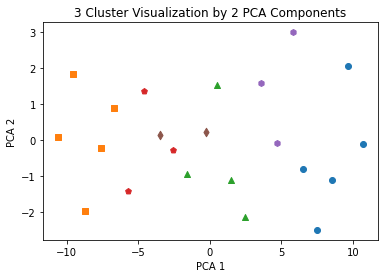

In [167]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출 
marker0_ind = data[data['cluster']==0].index
marker1_ind = data[data['cluster']==1].index
marker2_ind = data[data['cluster']==2].index
marker3_ind = data[data['cluster']==3].index
marker4_ind = data[data['cluster']==4].index
marker5_ind = data[data['cluster']==5].index
# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=data.loc[marker0_ind, 'pca_x'], y=data.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=data.loc[marker1_ind, 'pca_x'], y=data.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=data.loc[marker2_ind, 'pca_x'], y=data.loc[marker2_ind, 'pca_y'], marker='^')
plt.scatter(x=data.loc[marker3_ind, 'pca_x'], y=data.loc[marker3_ind, 'pca_y'], marker='p')
plt.scatter(x=data.loc[marker4_ind, 'pca_x'], y=data.loc[marker4_ind, 'pca_y'], marker='h')
plt.scatter(x=data.loc[marker5_ind, 'pca_x'], y=data.loc[marker5_ind, 'pca_y'], marker='d')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

In [168]:
def visualize_sil(List, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np



    for n_clusters in List:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters + \
                          '\nSilhouette Score :' + str(round(silhouette_avg,3)) ,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()



For n_clusters = 2 The average silhouette_score is : 0.480740777799531
For n_clusters = 3 The average silhouette_score is : 0.3785994236096983
For n_clusters = 4 The average silhouette_score is : 0.32283638830294437
For n_clusters = 5 The average silhouette_score is : 0.28818512831157594
For n_clusters = 6 The average silhouette_score is : 0.2710916880038873
For n_clusters = 7 The average silhouette_score is : 0.19366417193680582


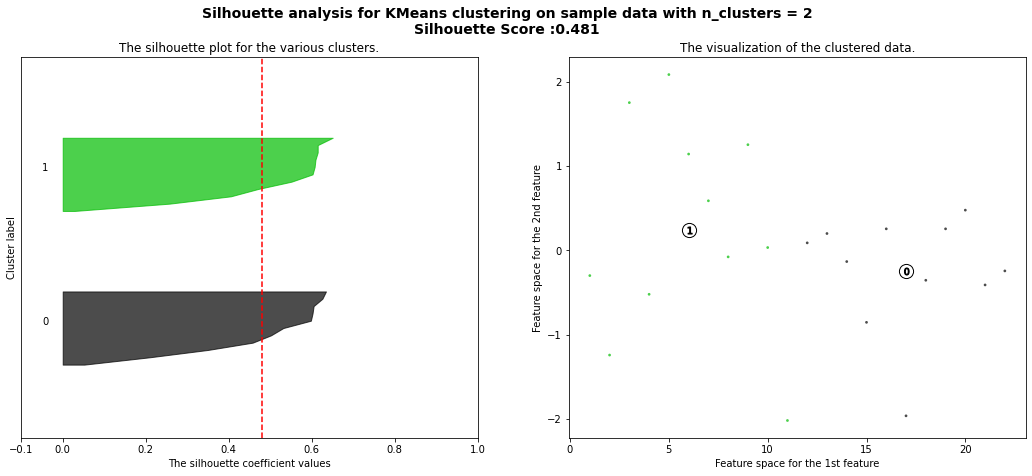

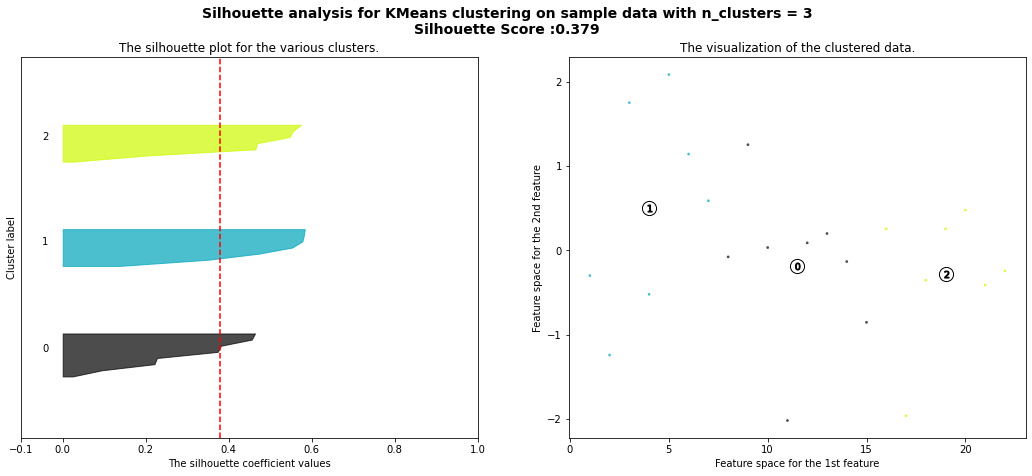

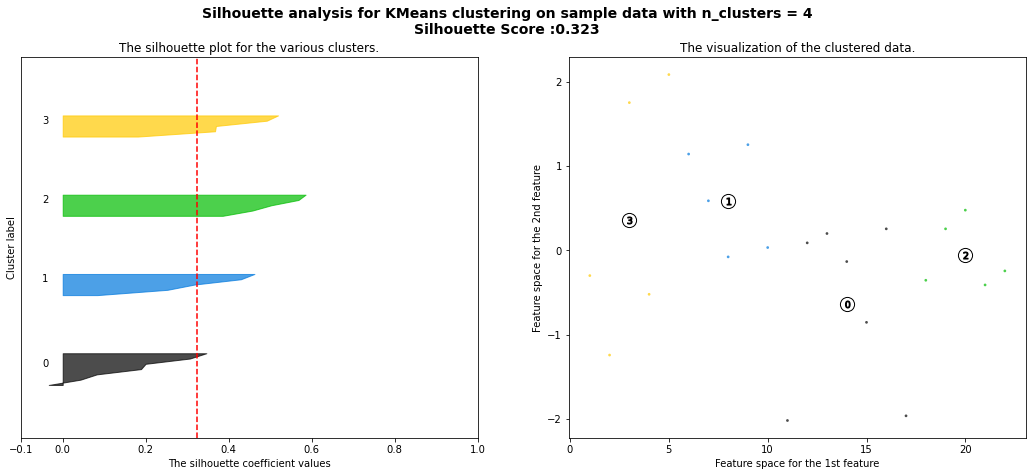

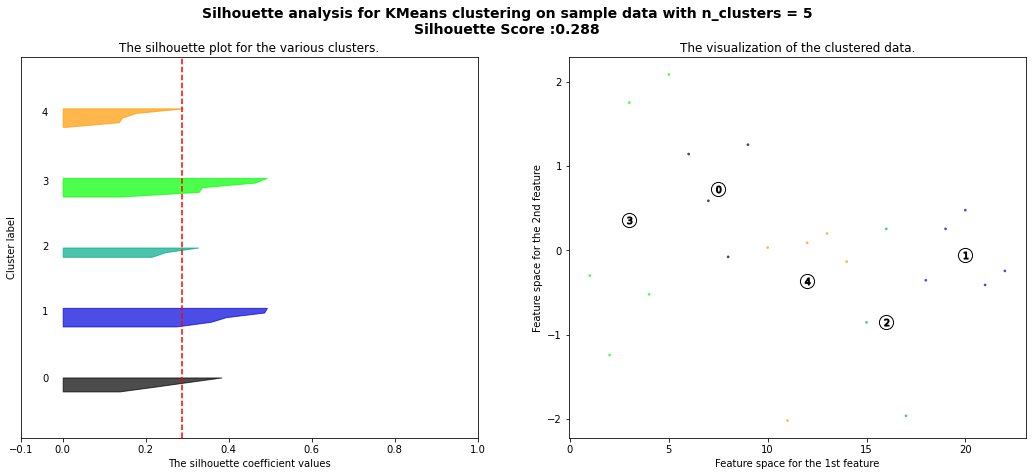

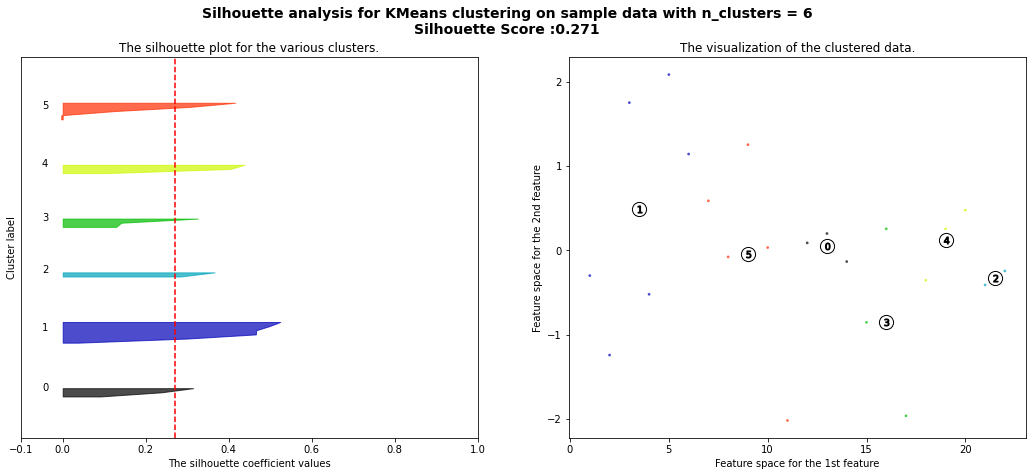

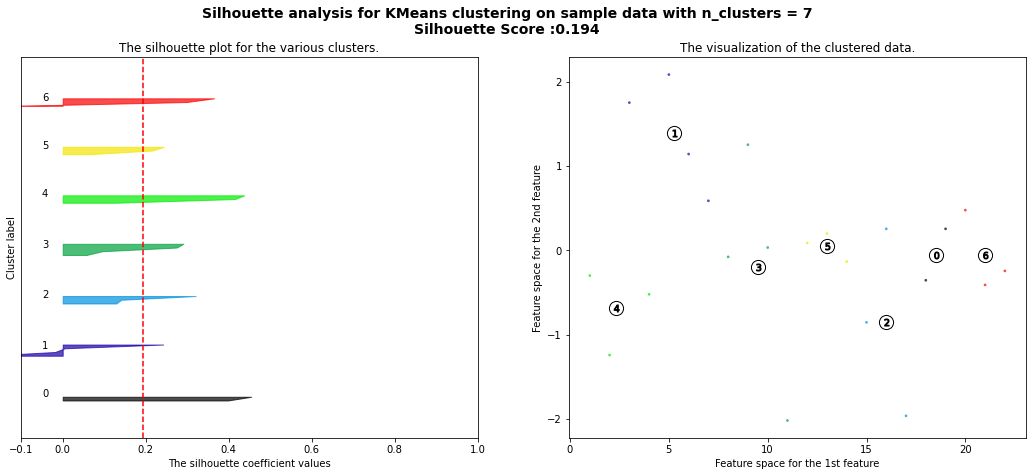

In [169]:
visualize_sil([2, 3, 4, 5, 6, 7], data.drop(columns=['Company'], axis=1, inplace=False).values)

In [1]:
print(34)

34
